In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display


In [3]:
# Load SentenceTransformer model for embeddings
def load_model():
    return SentenceTransformer('all-MiniLM-L6-v2')

model = load_model()


In [4]:
# Split text into chunks
def chunk_text(text, chunk_size):
    words = text.split()
    return [" ".join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]


In [5]:
# Generate embeddings for the chunks
def compute_embeddings(chunks, model):
    return model.encode(chunks)


In [6]:
# Reduce dimensions for visualization
def reduce_dimensions(embeddings):
    if len(embeddings) < 2:
        raise ValueError("At least two chunks are required to perform dimensionality reduction.")
    pca = PCA(n_components=2)
    return pca.fit_transform(embeddings)


In [7]:
poems = {
    0: """
Minha terra tem palmeiras,  
Onde canta o Sabiá;  
As aves, que aqui gorjeiam,  
Não gorjeiam como lá.  

Nosso céu tem mais estrelas,  
Nossas várzeas têm mais flores,  
Nossos bosques têm mais vida,  
Nossa vida mais amores.  

Em cismar, sozinho, à noite,  
Mais prazer encontro eu lá;  
Minha terra tem palmeiras,  
Onde canta o Sabiá.  

Minha terra tem primores,  
Que tais não encontro eu cá;  
Em cismar – sozinho, à noite –  
Mais prazer encontro eu lá;  
Minha terra tem palmeiras,  
Onde canta o Sabiá.  

Não permita Deus que eu morra,  
Sem que volte para lá;  
Sem que desfrute os primores  
Que não encontro por cá;  
Sem qu’inda aviste as palmeiras,  
Onde canta o Sabiá.  
""",
    1: """
De tudo, ao meu amor serei atento  
Antes, e com tal zelo, e sempre, e tanto  
Que mesmo em face do maior encanto  
Dele se encante mais meu pensamento.  

Quero vivê-lo em cada vão momento  
E em louvor hei de espalhar meu canto  
E rir meu riso e derramar meu pranto  
Ao seu pesar ou seu contentamento.  

E assim, quando mais tarde me procure  
Quem sabe a morte, angústia de quem vive  
Quem sabe a solidão, fim de quem ama  
Eu possa me dizer do amor (que tive):  

Que não seja imortal, posto que é chama  
Mas que seja infinito enquanto dure.  
""",
    2: """
O meu nome é Severino,  
não tenho outro de pia.  
Como há muitos Severinos,  
que é santo de romaria,  
deram então de me chamar  
Severino de Maria;  
como há muitos Severinos  
com mães chamadas Maria,  
fiquei sendo o da Maria  
do finado Zacarias.  

Mas isso ainda diz pouco:  
há muitos na freguesia,  
por causa de um coronel  
que se chamou Zacarias  
e que foi o mais antigo  
senhor desta sesmaria.  

Como então dizer quem fala  
ora a Vossas Senhorias?  
Vejamos: é o Severino  
da Maria do Zacarias,  
lá da serra da Costela,  
limites da Paraíba.  

Mas isso ainda diz pouco:  
se ao menos mais cinco havia  
com nome de Severino  
filhos de tantas Marias  
"""
}

In [8]:
def show_poem(poem_text):
    print(poem_text)
    chunk_size = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Chunk size:')
    display(chunk_size)
    button = widgets.Button(description="Generate Embeddings")
    display(button)

    def on_button_clicked(b):
        chunks = chunk_text(poem_text, chunk_size.value)
        print(f"Generated {len(chunks)} chunks.")
        if len(chunks) < 2:
            print("You need at least two chunks for visualization. Try reducing the chunk size.")
        else:
            embeddings = compute_embeddings(chunks, model)
            reduced_embeddings = reduce_dimensions(embeddings)
            fig, ax = plt.subplots()
            ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
            for i, chunk in enumerate(chunks):
                ax.annotate(f"Chunk {i+1}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8, alpha=0.6)
            ax.set_title("Embedding Cloud")
            ax.set_xlabel("PCA Component 1")
            ax.set_ylabel("PCA Component 2")
            plt.show()

    button.on_click(on_button_clicked)
    


Minha terra tem palmeiras,  
Onde canta o Sabiá;  
As aves, que aqui gorjeiam,  
Não gorjeiam como lá.  

Nosso céu tem mais estrelas,  
Nossas várzeas têm mais flores,  
Nossos bosques têm mais vida,  
Nossa vida mais amores.  

Em cismar, sozinho, à noite,  
Mais prazer encontro eu lá;  
Minha terra tem palmeiras,  
Onde canta o Sabiá.  

Minha terra tem primores,  
Que tais não encontro eu cá;  
Em cismar – sozinho, à noite –  
Mais prazer encontro eu lá;  
Minha terra tem palmeiras,  
Onde canta o Sabiá.  

Não permita Deus que eu morra,  
Sem que volte para lá;  
Sem que desfrute os primores  
Que não encontro por cá;  
Sem qu’inda aviste as palmeiras,  
Onde canta o Sabiá.  



IntSlider(value=10, description='Chunk size:', max=50, min=1)

Button(description='Generate Embeddings', style=ButtonStyle())

Generated 57 chunks.


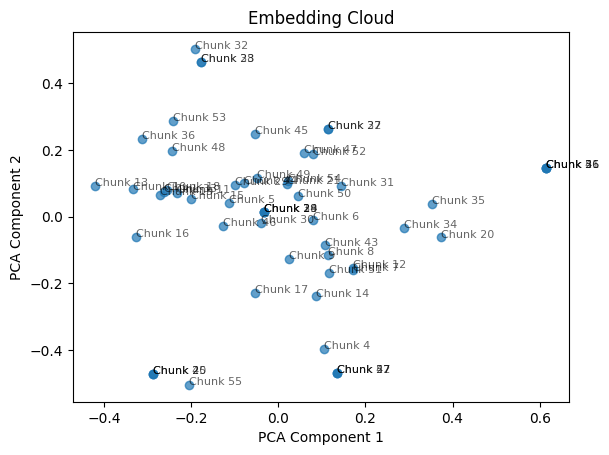

In [9]:
show_poem(poems[0])


De tudo, ao meu amor serei atento  
Antes, e com tal zelo, e sempre, e tanto  
Que mesmo em face do maior encanto  
Dele se encante mais meu pensamento.  

Quero vivê-lo em cada vão momento  
E em louvor hei de espalhar meu canto  
E rir meu riso e derramar meu pranto  
Ao seu pesar ou seu contentamento.  

E assim, quando mais tarde me procure  
Quem sabe a morte, angústia de quem vive  
Quem sabe a solidão, fim de quem ama  
Eu possa me dizer do amor (que tive):  

Que não seja imortal, posto que é chama  
Mas que seja infinito enquanto dure.  



IntSlider(value=10, description='Chunk size:', max=50, min=1)

Button(description='Generate Embeddings', style=ButtonStyle())

Generated 51 chunks.


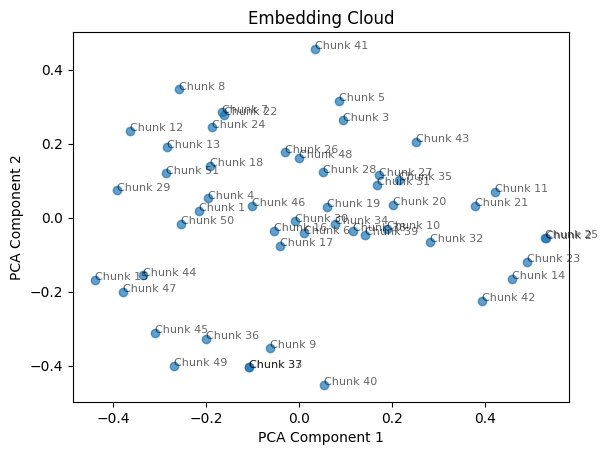

In [10]:
show_poem(poems[1])


O meu nome é Severino,  
não tenho outro de pia.  
Como há muitos Severinos,  
que é santo de romaria,  
deram então de me chamar  
Severino de Maria;  
como há muitos Severinos  
com mães chamadas Maria,  
fiquei sendo o da Maria  
do finado Zacarias.  

Mas isso ainda diz pouco:  
há muitos na freguesia,  
por causa de um coronel  
que se chamou Zacarias  
e que foi o mais antigo  
senhor desta sesmaria.  

Como então dizer quem fala  
ora a Vossas Senhorias?  
Vejamos: é o Severino  
da Maria do Zacarias,  
lá da serra da Costela,  
limites da Paraíba.  

Mas isso ainda diz pouco:  
se ao menos mais cinco havia  
com nome de Severino  
filhos de tantas Marias  



IntSlider(value=10, description='Chunk size:', max=50, min=1)

Button(description='Generate Embeddings', style=ButtonStyle())

Generated 57 chunks.


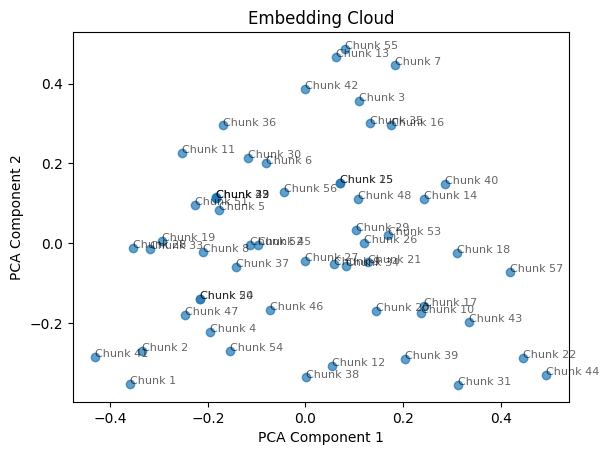

In [11]:
show_poem(poems[2])